IMPORTING LIBRARIES

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMPORTING THE DATASET AND SETTING THE PARAMETERS FOR TRAINING

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Tomato_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE), 
    batch_size = BATCH_SIZE 
)

Found 6074 files belonging to 4 classes.


VIEWING THE CLASS NAMES AND VISUALIZING THE IMAGES

In [9]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [11]:
len(dataset)

95

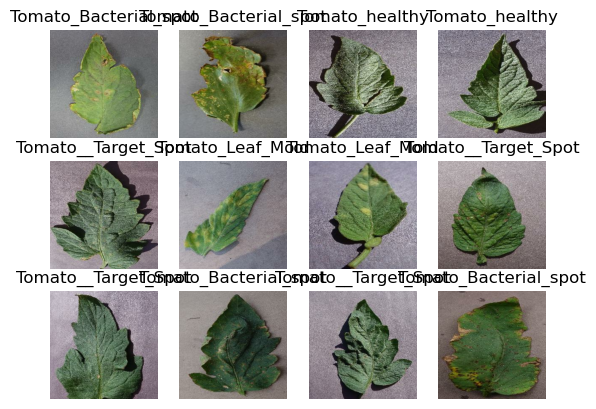

In [13]:
plt.figure(figure=(10,10))
for image_batch, label_batch in dataset.take(10):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

DIVIDING THE DATASET INTO TRAINING, VALIDATION AND TESTING WITH 80%, 10%, AND 10% RESPECTIVELY

In [16]:
len(dataset)

95

In [18]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [20]:
train_size = 0.8
len(dataset)*train_size

76.0

In [22]:
train_ds = dataset.take(76)
len(train_ds)

76

In [24]:
test_ds = dataset.skip(76)
len(test_ds)

19

In [26]:
val_size = 0.1
len(dataset)*val_size

9.5

In [28]:
val_ds = dataset.take(9)
len(val_ds)

9

In [30]:
test_ds = test_ds.skip(9)
len(test_ds)

10

In [32]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
   
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_split, val_split, test_ds

In [34]:
train_split, val_split, test_ds = get_dataset_partitions_tf(dataset)

In [36]:
len(train_ds)

76

In [38]:
len(val_ds)

9

In [40]:
len(test_ds)

10

MEMORY OPTIMIZATION CODE

In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

SETTING THE IMAGES INTO THE SAME SIZE AND SCALE

In [46]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

DATA AUGMENTATION PROCESS TO MAKE MORE DATA AVAILABLE FOR TRAINING

In [49]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

MODEL ARCHITECTURING

In [52]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3, 3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\abass\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
SUMMARIZING THE MODEL ARCHITECTURE

SyntaxError: invalid syntax (3308813732.py, line 1)

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (64, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (64, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (64, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (64, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (64, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (64, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (64, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (64, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (64, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (64, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (64, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (64, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (64, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [60]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds 
)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.3949 - loss: 1.2729 - val_accuracy: 0.5590 - val_loss: 0.9244
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.7095 - loss: 0.7210 - val_accuracy: 0.5903 - val_loss: 1.1154
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.8291 - loss: 0.4573 - val_accuracy: 0.6285 - val_loss: 1.5163
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9135 - loss: 0.2355 - val_accuracy: 0.4358 - val_loss: 2.0382
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9216 - loss: 0.2189 - val_accuracy: 0.7812 - val_loss: 0.7460
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9387 - loss: 0.1651 - val_accuracy: 0.7465 - val_loss: 1.0048
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.9425 - loss: 0.1666 - val_accuracy: 0.8125 - val_loss: 0.7164
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.9593 - loss: 0.1207 - val_accuracy: 0.8958 - v

TESTING THE MODEL WITH THE TEST DATASET. ALSO PERFORMING SOME OPERATIONS TO MEASURE THE PERFORMANCE LEVEL OF THE MODEL

In [90]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 735ms/step - accuracy: 0.9821 - loss: 0.0568


In [92]:
scores

[0.09170685708522797, 0.971875011920929]

In [94]:
history

In [96]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 76}

In [98]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

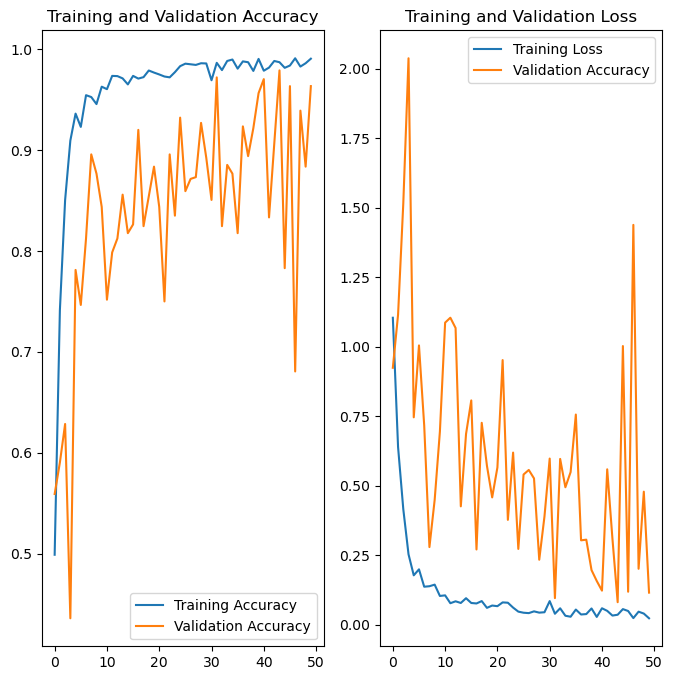

In [102]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Leaf_Mold
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step
predicted label: Tomato_Leaf_Mold


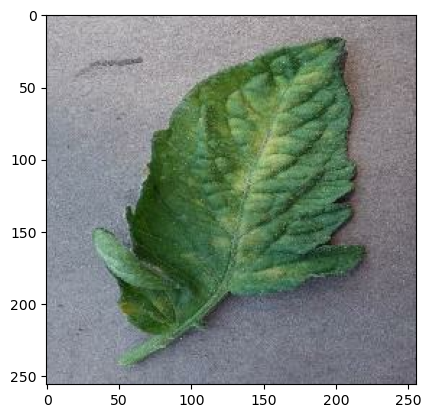

In [104]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [106]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


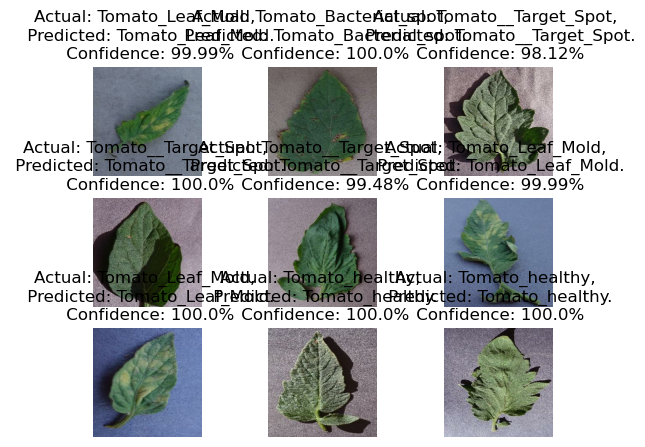

In [108]:
plt.figure(figure=(5,5))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [110]:
model_version = 1  # or any version number you wish to use
export_dir = f"../saved_models/{model_version}"

In [112]:
model.export(export_dir)

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


Saved artifact at '../saved_models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1396355083984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355084176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355086288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355086672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355086864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355087632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355087056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396355087824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396358627600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396358628752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396358628368: TensorSpec(shape=(

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load your test dataset and predictions (same as before)
X_test, y_test = [], []  # Adjust this part for your actual data pipeline
for images, labels in test_ds:  # Assuming test_dataset is a tf.data.Dataset
    X_test.extend(images.numpy())
    y_test.extend(labels.numpy())
X_test = np.array(X_test)
y_test = np.array(y_test)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Step 2: Metrics for multi-class classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

# Classification report
class_names = ['Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy']
report = classification_report(y_test, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)

# Step 3: Sensitivity and Specificity for Each Class
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
sensitivities = []
specificities = []
for i in range(len(class_names)):
    tp = conf_matrix[i, i]  # True positives
    fn = np.sum(conf_matrix[i, :]) - tp  # False negatives
    fp = np.sum(conf_matrix[:, i]) - tp  # False positives
    tn = np.sum(conf_matrix) - (tp + fn + fp)  # True negatives

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity

    sensitivities.append(sensitivity)
    specificities.append(specificity)

    print(f"Class: {class_names[i]}")
    print(f"  Sensitivity (Recall): {sensitivity:.2f}")
    print(f"  Specificity: {specificity:.2f}")

# Step 4: Visualize Confusion Matrix (same as before)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate each cell
thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 480. MiB for an array with shape (640, 256, 256, 3) and data type float32